# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">30 minutes</span>
* A2. Gradient Orientation: <span style="color:red;">1 hour</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">Several Hours</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">1.5 Hours</span>
* B. Hough Transform (Circles):  <span style="color:red;">Several More Hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

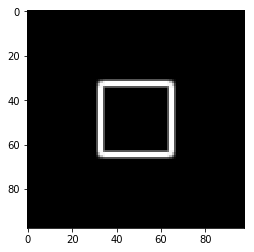

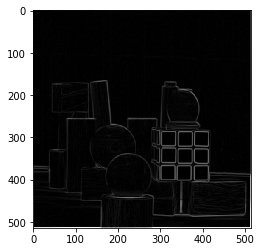

In [153]:
# Part 1. Compute the Gradient Magnitude

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2
import scipy
import math

def edgeDetect(image):
    xFilter = np.matrix([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    yFilter = np.matrix([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    dx = signal.convolve2d(image, xFilter)
    dy = signal.convolve2d(image, yFilter)
    delta = dx**2 + dy**2
    return np.sqrt(delta)

boxM = plt.imread('2D_White_Box.png')
boxM = cv2.GaussianBlur(boxM, (3, 3), 0)
boxM = edgeDetect(boxM)
boxM = cv2.normalize(boxM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(boxM, cmap='gray')
plt.show()

blocksM = plt.imread('blocks.png')
blocksM = cv2.GaussianBlur(blocksM, (3, 3), 0)
blocksM = edgeDetect(blocksM)
blocksM = cv2.normalize(blocksM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(blocksM, cmap='gray')
plt.show()
# Show your results on the blocks image


<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

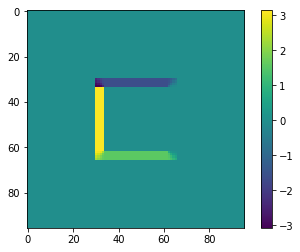

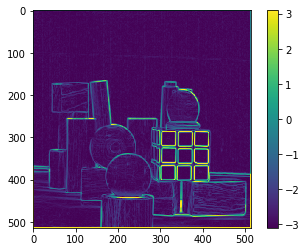

In [167]:
# Part 2. Compute the Gradient Orientation

def gradientOrientation(image):
    xFilter = np.matrix([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    yFilter = np.matrix([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    dx = signal.convolve2d(image, xFilter, mode='same', boundary='symm')
    dy = signal.convolve2d(image, yFilter, mode='same', boundary='symm')
    return np.arctan2(dy,dx)


boxG = plt.imread('2D_White_Box.png')
boxG = cv2.GaussianBlur(boxG, (3, 3), 0)
boxG = cv2.normalize(boxG, None, alpha=-3.1, beta=3.1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
boxG = gradientOrientation(boxG)
plt.imshow(boxG)
plt.colorbar()
plt.show()

blocksG = plt.imread('blocks.png')
blocksG = cv2.GaussianBlur(blocksG, (3, 3), 0)
blocksG = edgeDetect(blocksG)
blocksG = np.clip(blocksG, 0, 1.5)
blocksG = cv2.normalize(blocksG, None, alpha=-3.1, beta=3.1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(blocksG)
plt.colorbar()
plt.show()
# Show your results on the blocks image


<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



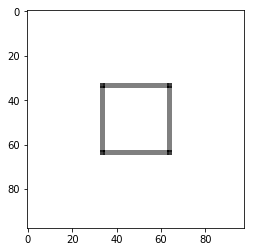

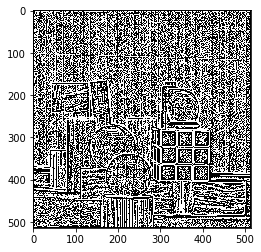

In [155]:
# Part 3. Find the Zero Crossings

def zeroCrossings(image):
    laplacian = np.matrix([[0, 1, 0],
                         [1, -4, 1],
                         [0, 1, 0]])
    lap = signal.convolve2d(image, laplacian)
    lap[lap == 0] = 255
    return lap

boxL = plt.imread('2D_White_Box.png')
boxL = cv2.GaussianBlur(boxL, (3, 3), 0)
boxL = zeroCrossings(boxL)
boxL = np.interp(boxL, (boxL.min(), 0), (0, 128))
boxL += np.interp(boxL, (0, boxL.max()), (128, 255))
plt.imshow(boxL, cmap='gray')
plt.show()

blocksL = plt.imread('blocks.png')
blocksL = cv2.GaussianBlur(blocksL, (3,3), 0)
blocksL = zeroCrossings(blocksL)
blocksL = np.interp(blocksL, (0, 0), (0, 128))
blocksL += np.interp(blocksL, (0, blocksL.max()), (128, 255))
plt.imshow(blocksL, cmap='gray')
plt.show()
# Show the results on blocks image


<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


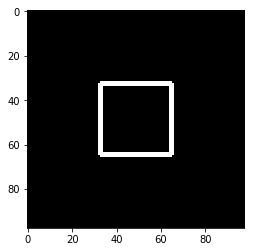

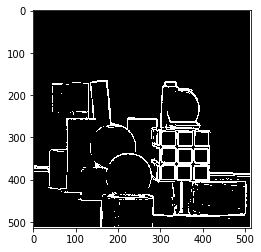

In [160]:
# Part 4. Final Solution

boxF = np.zeros(boxM.shape)
for row in range(boxF.shape[0]):
    for col in range(boxF.shape[1]):
        if boxM[row][col] > 180 and boxL[row][col] > 0:
            boxF[row][col] = 255
            
blocksF = np.zeros(blocksM.shape)
for row in range(blocksF.shape[0]):
    for col in range(blocksF.shape[1]):
        if blocksM[row][col] > 18 and blocksL[row][col] > 0:
            blocksF[row][col] = 255
        
plt.imshow(boxF, cmap='gray')
plt.show()

plt.imshow(blocksF, cmap='gray')
plt.show()
# Show the results on blocks image


##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span><br><br>
<p>This part was indeed fairly straightforward. Though I had trouble replicating the exact results Doctor Farrell provided us with. That being said, I feel like I understand the concepts involved fairly well, 
and later on when I am using builtin functions, I will know what is going on behind the scenes.  </p>


<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

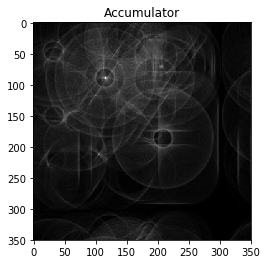

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


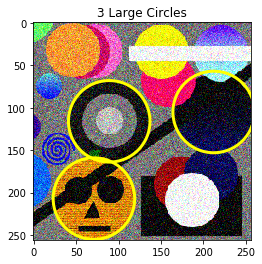

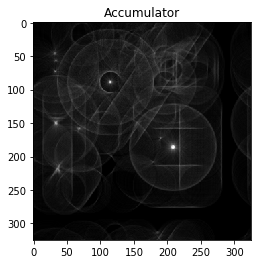

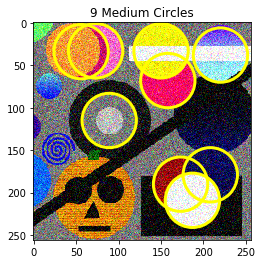

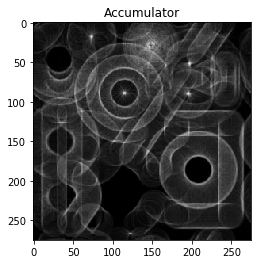

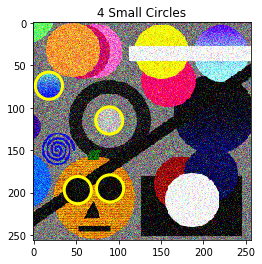

In [161]:
# Part B - Hough Transform - code below

import math

def getSobel(image):
    simpleSx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    simpleSy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return np.sqrt(simpleSx**2 + simpleSy**2)

def getEdgePixels(sobel, laplacian, threshold):
    edgePixelArray = []
    simpleC = np.zeros(sobel.shape)
    for row in range(simpleC.shape[0]):
        for col in range(simpleC.shape[1]):
            if sobel[row][col] > threshold and laplacian[row][col] > 0:
                simpleC[row][col] = 255
                edgePixelArray.append([row, col])
    return edgePixelArray, simpleC

def getAccumulatorArray(edgePixelArray, arrayShape, radius):
    accumulator = np.zeros(arrayShape)
    for key, edgePixel in enumerate(edgePixelArray):
        for theta in range(0, 360):
            x = math.floor(edgePixel[1] - radius * math.cos(math.radians(theta)))
            y = math.floor(edgePixel[0] - radius * math.sin(math.radians(theta)))
            accumulator[x,y] += 1
    return accumulator

def getCircles(accumulator, threshold):
    circleCoordinates = []
    for row in range(accumulator.shape[0]):
        for col in range(accumulator.shape[0]):
            if accumulator[row, col] > threshold:
                circleCoordinates.append([row, col])
    return circleCoordinates

# Found this on the internet SRC: https://stackoverflow.com/questions/29057159/non-local-maxima-suppression-in-python/29064515#29064515
def nonMaximalSupress1(image,NHoodSize):
    dX, dY = NHoodSize
    M, N = image.shape
    for x in range(0,M-dX+1):
        for y in range(0,N-dY+1):
            window = image[x:x+dX, y:y+dY]
            if np.sum(window)==0:
                localMax=0
            else:
                localMax = np.amax(window)
            maxCoord=np.unravel_index(np.argmax(window), window.shape) + np.array((x,y))
            image[x:x+dX, y:y+dY]=0
            image[tuple(maxCoord)] = localMax
    return image

small = 16
medium = 32
large = 48

circles = cv2.imread('circles.png', cv2.IMREAD_GRAYSCALE)
circles = cv2.GaussianBlur(circles, (3,3), 0)
circlesL = cv2.Laplacian(circles, cv2.CV_16S)
circlesS = getSobel(circles)


#Large Circles
circlesColor = cv2.imread('circles.png')
r = circlesColor[:,:,2]
r = cv2.GaussianBlur(r, (3,3), 0)
rL = cv2.Laplacian(r, cv2.CV_16S)
rS = getSobel(r)
circlesColor = plt.imread('circles.png')

edgePixelArray, circlesC = getEdgePixels(circlesS, circlesL, 1200)
edgeR, circlesR = getEdgePixels(rS, rL, 1500)

accumulator = getAccumulatorArray(edgePixelArray, (350, 350), large)
accumulator += getAccumulatorArray(edgeR, (350, 350), large)

plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator')
plt.show()

accumulator = nonMaximalSupress1(accumulator, (5,5))
circleCoordinates = getCircles(accumulator, 215)

plt.imshow(circlesColor)
plt.title(str(len(circleCoordinates)) + " Large Circles")
for x,y in circleCoordinates:
    plt.subplot(111).add_artist(plt.Circle((x,y), large, color=(1,1,0), fill=False, linewidth=3))
plt.show()




#Medium Circles
circlesColor = cv2.imread('circles.png')
g = circlesColor[:,:,1]
g = cv2.GaussianBlur(g, (5,5), 0)
gL = cv2.Laplacian(g, cv2.CV_16S)
gS = getSobel(g)

b = circlesColor[:,:,0]
b = cv2.GaussianBlur(b, (5,5), 0)
bL = cv2.Laplacian(b, cv2.CV_16S)
bS = getSobel(b)

r = circlesColor[:,:,2]
r = cv2.GaussianBlur(r, (5,5), 0)
rL = cv2.Laplacian(r, cv2.CV_16S)
rS = getSobel(r)
circlesColor = plt.imread('circles.png')



edgeR, circlesR = getEdgePixels(rS, rL, 2400)
edgeG, circlesG = getEdgePixels(gS, gL, 2400)
edgeB, circlesB = getEdgePixels(bS, bL, 2400)

accumulator = getAccumulatorArray(edgeR, (325, 325), medium)
accumulator += getAccumulatorArray(edgeG, (325, 325), medium)
accumulator += getAccumulatorArray(edgeB, (325, 325), medium)

plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator')
plt.show()

accumulator = nonMaximalSupress1(accumulator, (5,5))
circleCoordinates = getCircles(accumulator, 219)

plt.imshow(circlesColor)
plt.title(str(len(circleCoordinates)) + " Medium Circles")
for x,y in circleCoordinates:
    plt.subplot(111).add_artist(plt.Circle((x,y), medium, color=(1,1,0), fill=False, linewidth=3))
plt.show()







#Small Circles
circlesColor = cv2.imread('circles.png')
g = circlesColor[:,:,1]
g = cv2.GaussianBlur(g, (5,5), 0)
gL = cv2.Laplacian(g, cv2.CV_16S)
gS = getSobel(g)

b = circlesColor[:,:,0]
b = cv2.GaussianBlur(b, (5,5), 0)
bL = cv2.Laplacian(b, cv2.CV_16S)
bS = getSobel(b)
circlesColor = plt.imread('circles.png')

edgeG, circlesG = getEdgePixels(gS, gL, 2000)
edgeB, circlesB = getEdgePixels(bS, bL, 2000)

accumulator = getAccumulatorArray(edgePixelArray, (275, 275), small)
accumulator += getAccumulatorArray(edgeG, (275, 275), small)
accumulator += getAccumulatorArray(edgeB, (275, 275), small)

plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator')
plt.show()

accumulator = nonMaximalSupress1(accumulator, (5,5))
circleCoordinates = getCircles(accumulator, 370)

plt.imshow(circlesColor)
plt.title(str(len(circleCoordinates)) + " Small Circles")
for x,y in circleCoordinates:
    plt.subplot(111).add_artist(plt.Circle((x,y), small, color=(1,1,0), fill=False, linewidth=3))
plt.show()



# plt.imshow(circlesG, cmap='gray')
# plt.title('G')
# plt.show()

# plt.imshow(circlesR, cmap='gray')#
# plt.title('R')
# plt.show()

# plt.imshow(circlesB, cmap='gray')
# plt.title('B')
# plt.show()

# plt.imshow(circlesC, cmap='gray') #
# plt.title('C')
# plt.show()


# simpleColor = plt.imread('simpleCircle.png')
# simple = cv2.imread('simpleCircle.png', cv2.IMREAD_GRAYSCALE)
# simple = cv2.GaussianBlur(simple, (3,3), 0)
# simpleL = cv2.Laplacian(simple, cv2.CV_16S)
# simpleS = getSobel(simple)

# edgePixelArray, simpleC = getEdgePixels(simpleS, simpleL, 10)
# accumulator = getAccumulatorArray(edgePixelArray, simpleS.shape, medium)
# circleCoordinates = getCircles(accumulator, 196)

# plt.imshow(simpleL, cmap='gray')
# plt.title('Laplacian')
# plt.show()
# plt.imshow(simpleS, cmap='gray')
# plt.title('Sobel')
# plt.show()

# plt.imshow(accumulator, cmap='gray')
# plt.title('Accumulator')
# plt.show()
# plt.imshow(simpleColor)
# plt.title(str(len(circleCoordinates)) + " Medium Circles")
# for x,y in circleCoordinates:
#     plt.subplot(111).add_artist(plt.Circle((x,y), 32, color=(1,1,0), fill=False, linewidth=3))
# plt.show()

# Be sure to show all of the figures required in the description above


##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
<br><br>
<p>This was a very interesting exercise, and I was able to learn a lot through it. I was able to find most of the circles in the image, though to do that, I had to fine tune my algorithm for each size in this specific image. More work would be needed to further generalize it. I was able to minimize false positives through the heavy use of non-maximal supression and the setting of high thresholds in edge detection. The only thing that proved difficult, and that I wasn't able to implement was the detection of those circles along the left edge that are mostly out of the frame.</p>
